**Importing and cleaning data**

In [ ]:
import pandas as pd

customers_data = pd.read_csv('Telco-Customer-Churn.csv')

customers_data['TotalCharges'] = pd.to_numeric(customers_data['TotalCharges'], errors='coerce')
customers_data.drop(columns='customerID', inplace=True)

customers_data.isnull().sum()
customers_data.dropna(inplace=True)

final_customers_data = pd.get_dummies(customers_data, drop_first=True, dtype=int)

final_customers_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


**Creating and fitting model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = final_customers_data['Churn_Yes']
X = final_customers_data.drop(columns='Churn_Yes')

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

customers_model = RandomForestClassifier(max_leaf_nodes=50, random_state=1)
customers_model.fit(train_X, train_y)

customers_predictions = customers_model.predict(val_X)

**Checking accuracy**

In [ ]:
from sklearn.metrics import classification_report

binary_predictions = (customers_predictions > 0.3).astype(int)
print(classification_report(val_y, binary_predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.68      0.47      0.55       464

    accuracy                           0.80      1758
   macro avg       0.76      0.69      0.71      1758
weighted avg       0.79      0.80      0.79      1758



**Simple graph which presents features' influence**

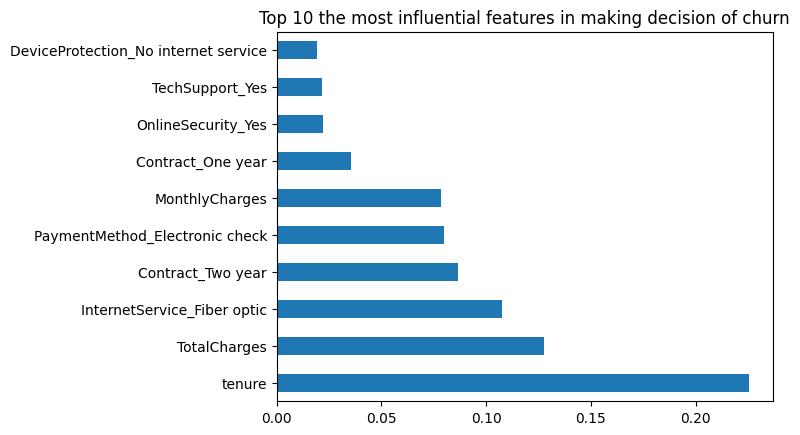

In [ ]:
import matplotlib.pyplot as plt

importances = pd.Series(customers_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 the most influential features in making decision of churn")
plt.show()